# **CIFAR-10 Image Classification**

Implemente uma CNN para resolver o problema de classificação de objetos em imagens utilizando a base de dados CIFAR-10, disponível: https://www.cs.toronto.edu/~kriz/cifar.html.

Apresente também a curva do erro médio e a matriz de confusão do modelo treinado.

**Importando as bibliotecas**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import cv2

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

from sklearn.metrics import confusion_matrix, accuracy_score

# Parte 1 - Obtenção dos Dados

**Baixando o dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

**Verificando o tamanho do dataset**

In [ ]:
print('Dados de treino:')
for i in (train_images, train_labels):
  print(i.shape)

print('\nDados de teste e validação:')
for i in (test_images, test_labels):
  print(i.shape)

Dados de treino:
(50000, 32, 32, 3)
(50000, 1)

Dados de teste e validação:
(10000, 32, 32, 3)
(10000, 1)


**Dividindo os dados de teste e validação**

In [ ]:
(val_images, val_labels) = test_images[0:2000], test_labels[0:2000]
(test_images, test_labels) = test_images[2000:], test_labels[2000:]

print('Dados de validação:')
for i in (val_images, val_labels):
  print(i.shape)

print('\nDados de teste:')
for i in (test_images, test_labels):
  print(i.shape)

Dados de validação:
(2000, 32, 32, 3)
(2000, 1)

Dados de teste:
(8000, 32, 32, 3)
(8000, 1)


**Normalizando os dados do dataset**

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images, val_images = train_images / 255.0, test_images / 255.0 , val_images/255.0

**Visualizando as imagens do dataset**

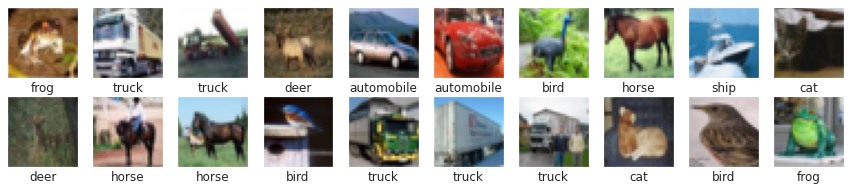

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Parte 2 - Rede Neural Convolucional (CNN)

**Construção da rede**

In [ ]:
model = models.Sequential()
# he_uniform => 
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_79 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treinando a Rede**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4188 - accuracy: 0.4994 - val_loss: 1.0348 - val_accuracy: 0.6405
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9507 - accuracy: 0.6681 - val_loss: 0.8899 - val_accuracy: 0.6950
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7679 - accuracy: 0.7371 - val_loss: 0.7418 - val_accuracy: 0.7525
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6532 - accuracy: 0.7770 - val_loss: 0.6739 - val_accuracy: 0.7715
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5681 - accuracy: 0.8062 - val_loss: 0.6519 - val_accuracy: 0.7795
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4959 - accuracy: 0.8315 - val_loss: 0.6114 - val_accuracy: 0.7970
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4352 - accuracy: 0.8521 - val_loss: 0.5729 - val_ac

**Curva da Acurácia**

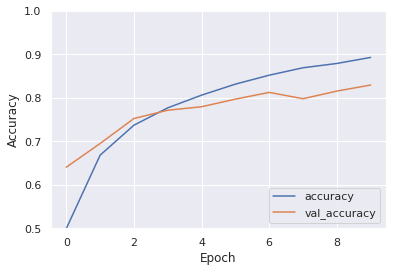

In [ ]:
sns.set_theme(style='darkgrid')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()

**Verificando a Acurácia**

In [ ]:
y_pred = model.predict(test_images)

In [ ]:
precisao = accuracy_score(test_labels.ravel(), y_pred.argmax(axis=1))
print("Acurácia do modelo:", np.round(precisao*100,2),'%')

Acurácia do modelo: 82.56 %


**Curva do Erro**

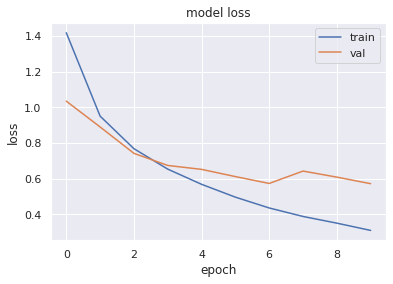

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

**Matriz de Confusão**

In [ ]:
cm = tf.math.confusion_matrix(labels=test_labels.ravel(), predictions=y_pred.argmax(axis=1))

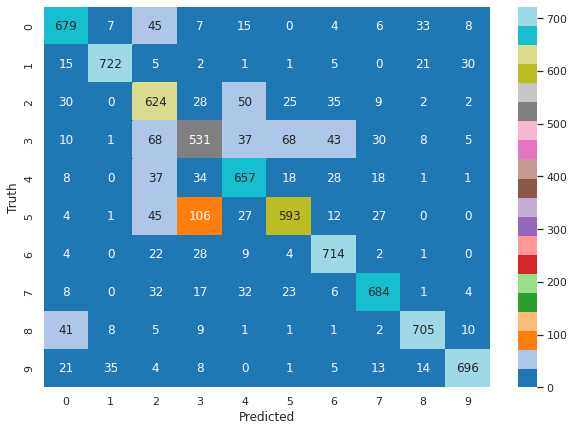

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap="tab20")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**Realizando predições**

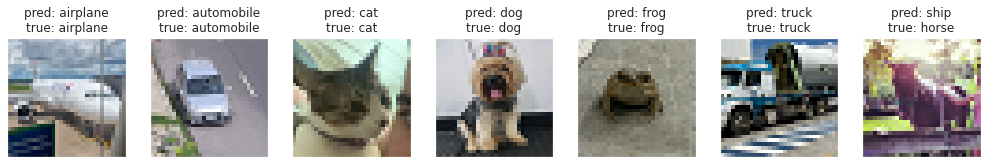

In [ ]:
images = ['airplane.png','automobile.png','cat.png','dog.png','frog.png','truck.png','horse.png']

fig = plt.figure(figsize=(20,4))
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    newimg = np.array(img)/255.0
    newimg = (np.array(newimg)).reshape(1, 32, 32, 3)
    classifications = model.predict(newimg)
    predictedLabel = tf.math.argmax(classifications[0])
    ax = fig.add_subplot(1,len(images)+1, images.index(i)+1,xticks=[], yticks=[])
    ax.set_title('pred: '+ class_names[predictedLabel]+'\ntrue: '+i[:-4])
    ax.imshow(img)
plt.show()